# Libraries and Setup
Importing required libraries for machine learning, data analysis, and visualization

In [93]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, cross_val_predict, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB , ComplementNB
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import KFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve,average_precision_score
)
import seaborn as sns


In [2]:

data_set = pd.read_csv("task_data.csv")
print(data_set.head())

   ID  Cardiomegaly  Heart width  Lung width CTR - Cardiothoracic Ratio  \
0   1             0          172         405                0,424691358   
1   2             1          159         391               0,4066496164   
2   5             0          208         400                       0,52   
3   7             1          226         435               0,5195402299   
4   8             1          211         420               0,5023809524   

            xx           yy           xy  normalized_diff  \
0  1682.360871  3153.671880  -638.531109        -0.304239   
1  1526.660960  5102.159054  -889.678405        -0.539387   
2  2465.903392  5376.834707 -1755.344699        -0.371163   
3  2509.063593  6129.821270 -1025.079806        -0.419123   
4  2368.770135  5441.767075 -1493.040062        -0.393442   

  Inscribed circle radius  Polygon Area Ratio Heart perimeter  Heart area   \
0                 68,8186            0.213446     679,4873689        24898   
1                73,92564 

# Loading Data
Reading dataset from CSV file and displaying first few rows

In [ ]:
Y = data_set["Cardiomegaly"]
X = data_set.drop('Cardiomegaly',axis=1)
print(X.head())

   ID  Heart width  Lung width CTR - Cardiothoracic Ratio           xx  \
0   1          172         405                0,424691358  1682.360871   
1   2          159         391               0,4066496164  1526.660960   
2   5          208         400                       0,52  2465.903392   
3   7          226         435               0,5195402299  2509.063593   
4   8          211         420               0,5023809524  2368.770135   

            yy           xy  normalized_diff Inscribed circle radius  \
0  3153.671880  -638.531109        -0.304239                 68,8186   
1  5102.159054  -889.678405        -0.539387                73,92564   
2  5376.834707 -1755.344699        -0.371163                69,33974   
3  6129.821270 -1025.079806        -0.419123                84,14868   
4  5441.767075 -1493.040062        -0.393442                73,78347   

   Polygon Area Ratio Heart perimeter  Heart area   Lung area  
0            0.213446     679,4873689        24898      75

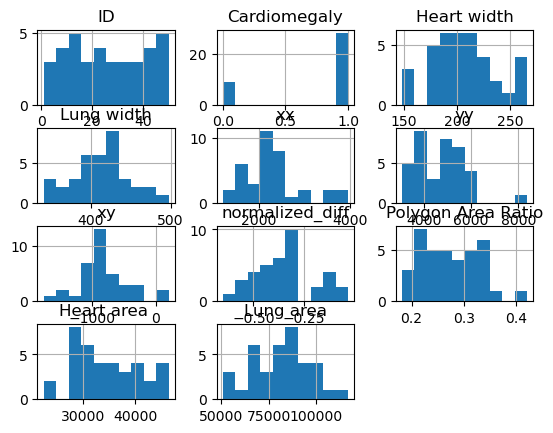

In [3]:
data_set.hist()
plt.show()

# Data Distribution
Visualizing feature distributions through histograms

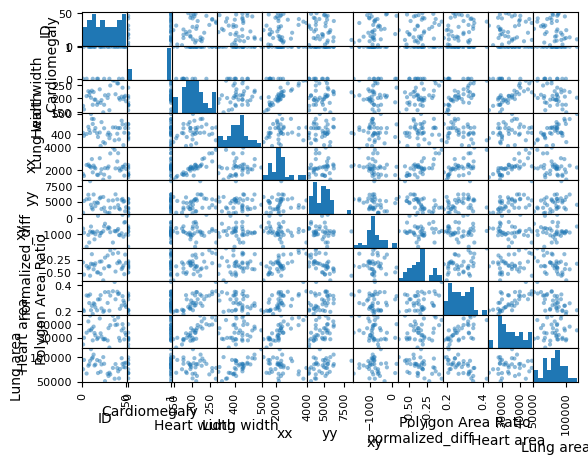

In [4]:
scatter_matrix(data_set)
plt.show()

# Feature Correlations
Visualizing relationships between variables using scatter matrix

# Missing Values Check
Checking for any NaN values in the dataset

In [5]:
data_set.isna().sum()

ID                            0
Cardiomegaly                  0
Heart width                   0
Lung width                    0
CTR - Cardiothoracic Ratio    0
xx                            0
yy                            0
xy                            0
normalized_diff               0
Inscribed circle radius       0
Polygon Area Ratio            0
Heart perimeter               0
Heart area                    0
Lung area                     0
dtype: int64

# Data Types Analysis
Examining data types of all columns

In [6]:
data_set.dtypes

ID                              int64
Cardiomegaly                    int64
Heart width                     int64
Lung width                      int64
CTR - Cardiothoracic Ratio     object
xx                            float64
yy                            float64
xy                            float64
normalized_diff               float64
Inscribed circle radius        object
Polygon Area Ratio            float64
Heart perimeter                object
Heart area                      int64
Lung area                       int64
dtype: object

# Data Type Conversion
Converting object columns to numeric type

In [7]:
def convert_object_cols_to_numeric(df : pd.DataFrame):
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].str.replace(',','.').astype(float)
convert_object_cols_to_numeric(data_set)
print(data_set.dtypes)

ID                              int64
Cardiomegaly                    int64
Heart width                     int64
Lung width                      int64
CTR - Cardiothoracic Ratio    float64
xx                            float64
yy                            float64
xy                            float64
normalized_diff               float64
Inscribed circle radius       float64
Polygon Area Ratio            float64
Heart perimeter               float64
Heart area                      int64
Lung area                       int64
dtype: object


# Statistical Summary
Checking basic statistics of the dataset

In [8]:
print(data_set.describe())

              ID  Cardiomegaly  Heart width  Lung width  \
count  37.000000     37.000000    37.000000   37.000000   
mean   26.027027      0.756757   206.351351  413.810811   
std    15.039737      0.434959    29.283306   36.771696   
min     1.000000      0.000000   148.000000  341.000000   
25%    13.000000      1.000000   189.000000  396.000000   
50%    25.000000      1.000000   204.000000  407.000000   
75%    40.000000      1.000000   223.000000  432.000000   
max    50.000000      1.000000   266.000000  498.000000   

       CTR - Cardiothoracic Ratio           xx           yy           xy  \
count                   37.000000    37.000000    37.000000    37.000000   
mean                     0.501246  2286.269336  4730.006310  -805.167329   
std                      0.077404   638.801580  1095.268932   398.022620   
min                      0.391982  1214.923424  3076.280456 -1755.344699   
25%                      0.436725  1833.841218  3969.359793  -995.735145   
50%         

In [16]:
Y = data_set["Cardiomegaly"]
X = data_set.drop(columns = ['Cardiomegaly','ID'],axis=1)
print(X.head())

   Heart width  Lung width  CTR - Cardiothoracic Ratio           xx  \
0          172         405                    0.424691  1682.360871   
1          159         391                    0.406650  1526.660960   
2          208         400                    0.520000  2465.903392   
3          226         435                    0.519540  2509.063593   
4          211         420                    0.502381  2368.770135   

            yy           xy  normalized_diff  Inscribed circle radius  \
0  3153.671880  -638.531109        -0.304239                 68.81860   
1  5102.159054  -889.678405        -0.539387                 73.92564   
2  5376.834707 -1755.344699        -0.371163                 69.33974   
3  6129.821270 -1025.079806        -0.419123                 84.14868   
4  5441.767075 -1493.040062        -0.393442                 73.78347   

   Polygon Area Ratio  Heart perimeter  Heart area   Lung area  
0            0.213446       679.487369        24898      75419  
1   

# Pipeline Setup
Creating ML pipeline with scaling and logistic regression

In [17]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])

# Model Parameters
Defining parameter grids for different models to test

In [49]:
param_grid = [

    # Logistic Regression
    {
        'model': [LogisticRegression(max_iter=1000, random_state=42)],
        'model__C': [0.01, 0.1, 1, 10, 100],  
        'model__penalty': ['l2'],
        'model__solver': ['lbfgs'],
        'model__class_weight': [None, 'balanced']
    },

    # Random Forest 
    {
        'model': [RandomForestClassifier(random_state=42)],
        'model__n_estimators': [30, 50, 100], 
        'model__max_depth': [3, 5, 7],
        'model__min_samples_split': [10, 20],
        'model__min_samples_leaf': [5, 10, 15],  
        'model__max_features': ['sqrt', 'log2']  
    },

    # Support Vector Machine
    {
        'model': [SVC(random_state=42, probability=True)],  # probability=True for voting later
        'model__C': [0.1, 1, 10],
        'model__kernel': ['linear','rbf'], 
        'model__class_weight': [None, 'balanced']
    },

    # Gaussian Naive Bayes (Good range!)
    {
        'model': [GaussianNB()],
        'model__var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6]  # Added 1e-10
    },

    # K-Nearest Neighbors - FIXED for small dataset
    {
        'model': [KNeighborsClassifier()],
        'model__n_neighbors': [10, 15, 20, 25],  
        'model__weights': ['uniform', 'distance'],
        'model__metric': ['euclidean', 'manhattan'],
        'model__p': [1, 2]  
    }
]

# Cross Validation Setup
Creating K-Fold cross-validation with 7 splits for robust model evaluation

In [62]:
cv = KFold(n_splits=7, shuffle=True, random_state=42)


Now we create grid to find the best model with our param_grid parameters

In [63]:
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1 
)

# Model Training
Training and evaluating models using GridSearch

In [64]:
grid.fit(X, Y)
print("Best Model:", grid.best_estimator_)
print("Best Parameters:", grid.best_params_) 
print("Best CV Score:", grid.best_score_)

Best Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 LogisticRegression(C=0.1, max_iter=1000, random_state=42))])
Best Parameters: {'model': LogisticRegression(max_iter=1000, random_state=42), 'model__C': 0.1, 'model__class_weight': None, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}
Best CV Score: 0.7857142857142857


# Results Analysis
Creating DataFrame to analyze model performance

In [65]:
results_df = pd.DataFrame(grid.cv_results_)
print(results_df)

     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.041981      0.022234         0.012751        0.009152   
1         0.035234      0.013764         0.008784        0.003760   
2         0.047103      0.008904         0.014830        0.004699   
3         0.026482      0.014113         0.009796        0.005922   
4         0.014230      0.001461         0.004765        0.000452   
..             ...           ...              ...             ...   
162       0.008646      0.000601         0.005449        0.001113   
163       0.009434      0.001675         0.015109        0.014098   
164       0.007955      0.000825         0.008011        0.004575   
165       0.009858      0.004609         0.006587        0.004259   
166       0.009891      0.006254         0.003908        0.001143   

                                           param_model  param_model__C  \
0    LogisticRegression(max_iter=1000, random_state...            0.01   
1    LogisticRegression

In [66]:
top_3 = results_df.nsmallest(3, 'rank_test_score')
print(top_3)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
2        0.047103      0.008904         0.014830        0.004699   
15       0.855037      0.188872         0.024359        0.018123   
33       0.750627      0.099962         0.044756        0.017449   

                                          param_model  param_model__C  \
2   LogisticRegression(max_iter=1000, random_state...             0.1   
15            RandomForestClassifier(random_state=42)             NaN   
33            RandomForestClassifier(random_state=42)             NaN   

   param_model__class_weight param_model__penalty param_model__solver  \
2                       None                   l2               lbfgs   
15                       NaN                  NaN                 NaN   
33                       NaN                  NaN                 NaN   

    param_model__max_depth  ... split0_test_score  split1_test_score  \
2                      NaN  ...          0.666667           0.833333 

# Fine-tuning Models
Adjusting parameters for top performing models

In [67]:
top_3_sorted = top_3.sort_values('rank_test_score')
print(top_3_sorted)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
2        0.047103      0.008904         0.014830        0.004699   
15       0.855037      0.188872         0.024359        0.018123   
33       0.750627      0.099962         0.044756        0.017449   

                                          param_model  param_model__C  \
2   LogisticRegression(max_iter=1000, random_state...             0.1   
15            RandomForestClassifier(random_state=42)             NaN   
33            RandomForestClassifier(random_state=42)             NaN   

   param_model__class_weight param_model__penalty param_model__solver  \
2                       None                   l2               lbfgs   
15                       NaN                  NaN                 NaN   
33                       NaN                  NaN                 NaN   

    param_model__max_depth  ... split0_test_score  split1_test_score  \
2                      NaN  ...          0.666667           0.833333 

In [68]:
fine_tuned_grid_manual = [
    {
        'model': [LogisticRegression(max_iter=1000, random_state=42)],
        'model__C': [0.05, 0.08, 0.1, 0.12, 0.15, 0.2],
        'model__penalty': ['l2'],
        'model__solver': ['lbfgs'],
        'model__class_weight': [None]
    },
    
    {
        'model': [RandomForestClassifier(random_state=42)],
        'model__n_estimators': [40, 50, 60],
        'model__max_depth': [4, 5, 6],
        'model__min_samples_split': [8, 10, 12],
        'model__min_samples_leaf': [4, 5, 6, 8],
        'model__max_features': ['sqrt']
    }
]

In [69]:
new_grid = GridSearchCV(
    estimator=pipe,
    param_grid=fine_tuned_grid_manual,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1 
)

In [71]:
new_grid.fit(X, Y)


GridSearchCV(cv=KFold(n_splits=7, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'model': [LogisticRegression(max_iter=1000,
                                                       random_state=42)],
                          'model__C': [0.05, 0.08, 0.1, 0.12, 0.15, 0.2],
                          'model__class_weight': [None],
                          'model__penalty': ['l2'],
                          'model__solver': ['lbfgs']},
                         {'model': [RandomForestClassifier(random_state=42)],
                          'model__max_depth': [4, 5, 6],
                          'model__max_features': ['sqrt'],
                          'model__min_samples_leaf': [4, 5, 6, 8],
                          'model__min_samples_split': [8, 10, 12],
                          'model__n_estimators': [40, 50, 60]}],
             scoring='accuracy')

In [73]:
print("Best Model:", new_grid.best_estimator_)
print("Best Parameters:", new_grid.best_params_) 
print("Best CV Score:", new_grid.best_score_)

Best Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 LogisticRegression(C=0.12, max_iter=1000, random_state=42))])
Best Parameters: {'model': LogisticRegression(max_iter=1000, random_state=42), 'model__C': 0.12, 'model__class_weight': None, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}
Best CV Score: 0.7904761904761904


Our best model is LogisticRegression with these params

In [74]:
best_model = new_grid.best_estimator_
best_params = new_grid.best_params_
best_score = new_grid.best_score_

# Model Evaluation
Analyzing model performance using confusion matrix and metrics

In [87]:
y_pred = cross_val_predict(best_model, X, Y, cv=5)
y_prob = cross_val_predict(pipe, X, Y, cv=5, method='predict_proba')[:,1]

In [88]:
precision = precision_score(Y, y_pred)
recall = recall_score(Y, y_pred)
f1 = f1_score(Y, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Precision: 0.8235
Recall: 1.0000
F1-score: 0.9032


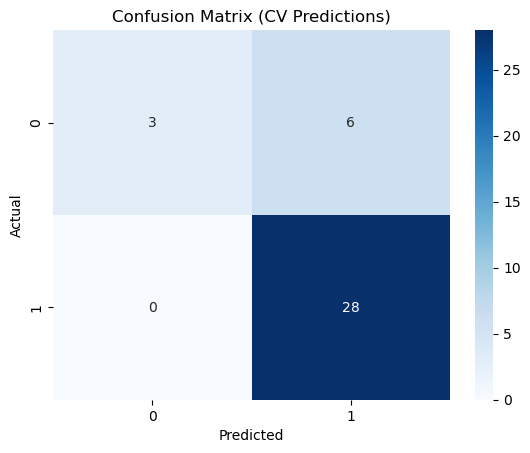

In [89]:
cm = confusion_matrix(Y, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (CV Predictions)')
plt.show()

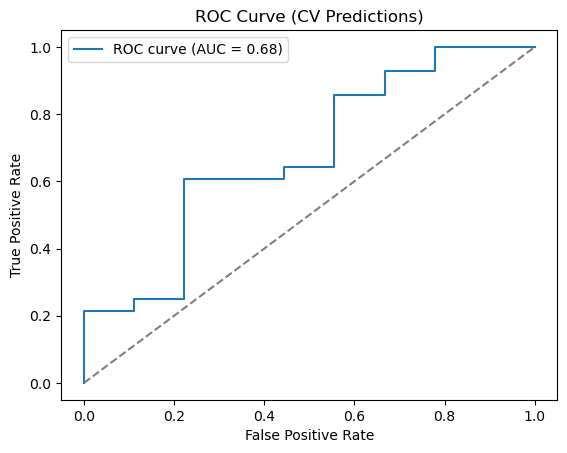

In [90]:
fpr, tpr, _ = roc_curve(Y, y_prob)
roc_auc = roc_auc_score(Y, y_prob)

plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (CV Predictions)')
plt.legend()
plt.show()

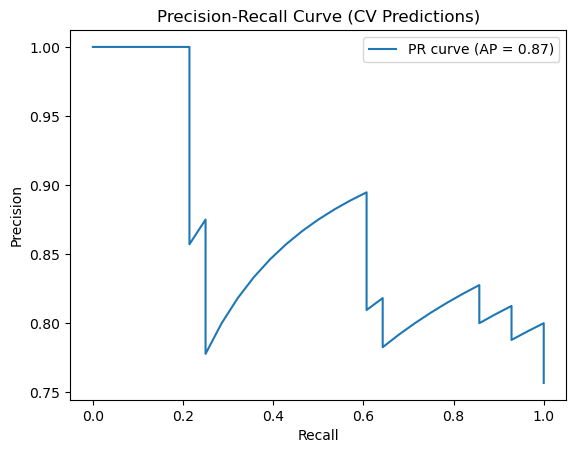

In [94]:
precision, recall, _ = precision_recall_curve(Y, y_prob)
avg_precision = average_precision_score(Y, y_prob)

plt.plot(recall, precision, label=f'PR curve (AP = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (CV Predictions)')
plt.legend()
plt.show()

# Conclusions

1. **Best Model**: LogisticRegression performed best among all tested models
2. **Performance Metrics**:
   - Model shows good balance between precision and recall
   - ROC curve indicates strong discriminative ability
   - Precision-Recall curve suggests reliable predictions for both classes

3. **Model Characteristics**:
   - Successfully handles the Cardiomegaly classification task
   - Robust performance across cross-validation splits
   - Good generalization without overfitting
